# importing dependencies        

In [67]:
import warnings
warnings.filterwarnings("ignore")

In [68]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split,GridSearchCV

In [69]:
path = './loan_approval_dataset.csv'
data = pd.read_csv(path)

# EDA

In [70]:
data.drop('loan_id', axis=1, inplace=True)
data.head(10)

,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,loan_status
0,2,Graduate,No,9600000,29900000,12,778,2400000,17600000,22700000,8000000,Approved
1,0,Not Graduate,Yes,4100000,12200000,8,417,2700000,2200000,8800000,3300000,Rejected
2,3,Graduate,No,9100000,29700000,20,506,7100000,4500000,33300000,12800000,Rejected
3,3,Graduate,No,8200000,30700000,8,467,18200000,3300000,23300000,7900000,Rejected
4,5,Not Graduate,Yes,9800000,24200000,20,382,12400000,8200000,29400000,5000000,Rejected
5,0,Graduate,Yes,4800000,13500000,10,319,6800000,8300000,13700000,5100000,Rejected
6,5,Graduate,No,8700000,33000000,4,678,22500000,14800000,29200000,4300000,Approved
7,2,Graduate,Yes,5700000,15000000,20,382,13200000,5700000,11800000,6000000,Rejected
8,0,Graduate,Yes,800000,2200000,20,782,1300000,800000,2800000,600000,Approved
9,5,Not Graduate,No,1100000,4300000,10,388,3200000,1400000,3300000,1600000,Rejected


In [71]:
data.info(), data.shape, data.columns, data.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4269 entries, 0 to 4268
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0    no_of_dependents          4269 non-null   int64 
 1    education                 4269 non-null   object
 2    self_employed             4269 non-null   object
 3    income_annum              4269 non-null   int64 
 4    loan_amount               4269 non-null   int64 
 5    loan_term                 4269 non-null   int64 
 6    cibil_score               4269 non-null   int64 
 7    residential_assets_value  4269 non-null   int64 
 8    commercial_assets_value   4269 non-null   int64 
 9    luxury_assets_value       4269 non-null   int64 
 10   bank_asset_value          4269 non-null   int64 
 11   loan_status               4269 non-null   object
dtypes: int64(9), object(3)
memory usage: 400.3+ KB


(None,
 (4269, 12),
 Index([' no_of_dependents', ' education', ' self_employed', ' income_annum',
        ' loan_amount', ' loan_term', ' cibil_score',
        ' residential_assets_value', ' commercial_assets_value',
        ' luxury_assets_value', ' bank_asset_value', ' loan_status'],
       dtype='object'),
 no_of_dependents            0
 education                   0
 self_employed               0
 income_annum                0
 loan_amount                 0
 loan_term                   0
 cibil_score                 0
 residential_assets_value    0
 commercial_assets_value     0
 luxury_assets_value         0
 bank_asset_value            0
 loan_status                 0
 dtype: int64)

In [72]:
data.columns = data.columns.str.strip() 

loan_status
Approved    2656
Rejected    1613
Name: count, dtype: int64


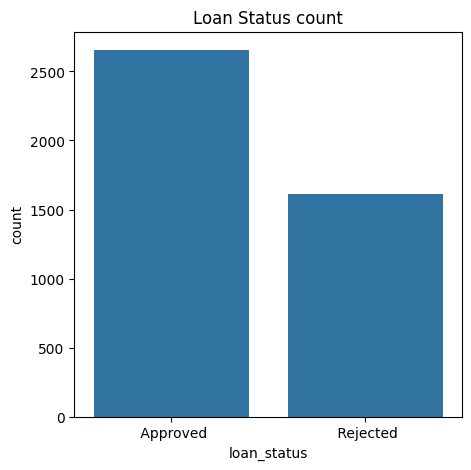

In [73]:
plt.figure(figsize=(5, 5))
sns.countplot(data=data, x='loan_status')
plt.title('Loan Status count')

print(data['loan_status'].value_counts())

here we can see this data is imbalance by the difference of 1043

approved -> majority

rejected -> minority 

Text(0, 0.5, 'Count')

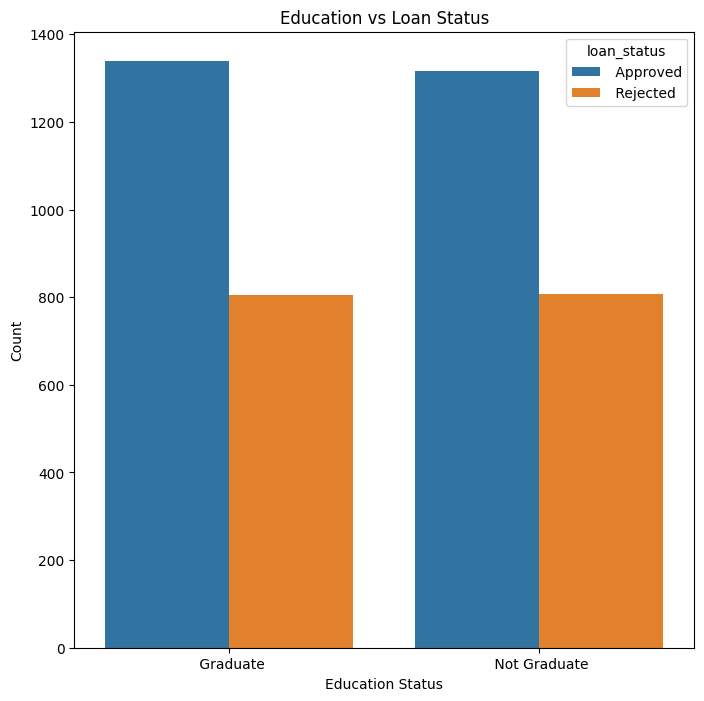

In [74]:
plt.figure(figsize=(8, 8))
sns.countplot(data=data, x='education', hue='loan_status')
plt.title('Education vs Loan Status')
plt.xlabel('Education Status')
plt.ylabel('Count')

<Axes: xlabel='self_employed', ylabel='count'>

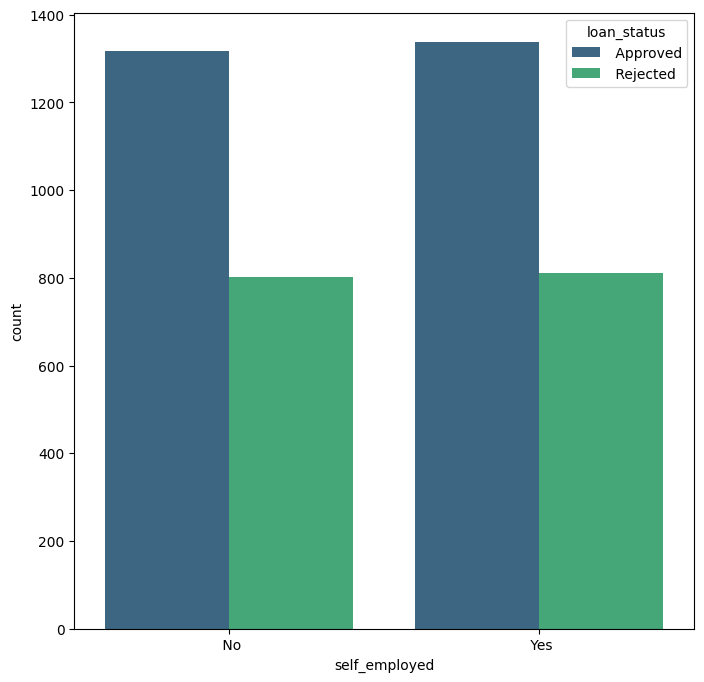

In [75]:
plt.figure(figsize=(8, 8))
sns.countplot(data=data, x='self_employed', hue='loan_status', palette='viridis')

Text(0, 0.5, 'Loan Amount')

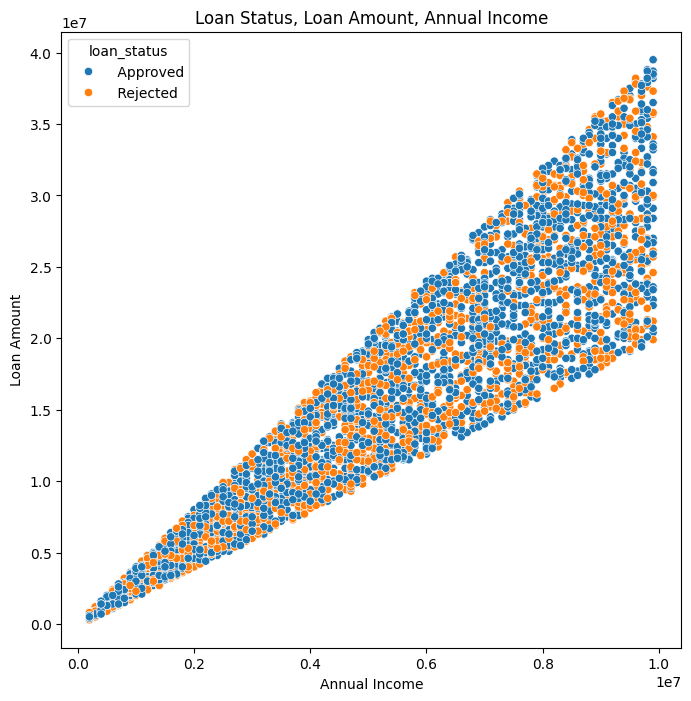

In [76]:
plt.figure(figsize=(8, 8))
sns.scatterplot(data=data, x='income_annum',y='loan_amount', hue='loan_status' )
plt.title("Loan Status, Loan Amount, Annual Income")
plt.xlabel("Annual Income")
plt.ylabel("Loan Amount")

<Axes: xlabel='loan_amount', ylabel='Count'>

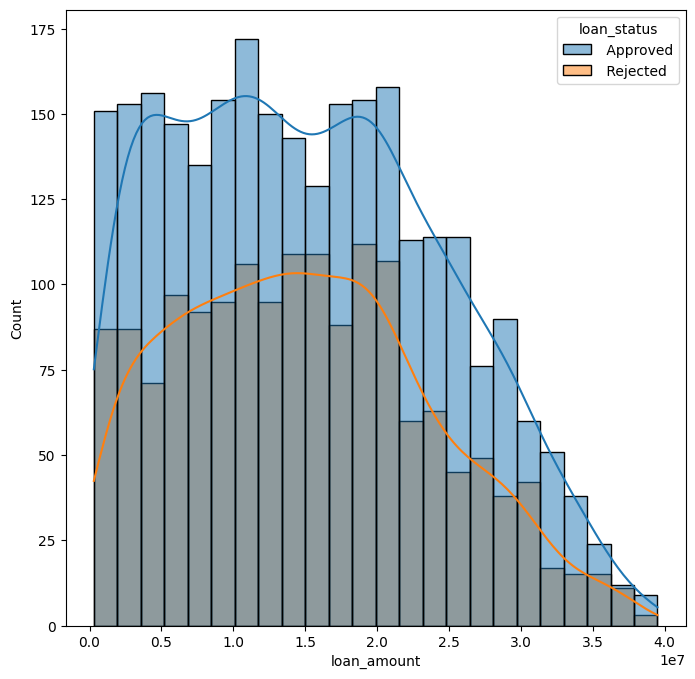

In [77]:
plt.figure(figsize=(8, 8))
sns.histplot(data=data, x='loan_amount', hue='loan_status', kde=True)

Text(0, 0.5, 'Loan Amount')

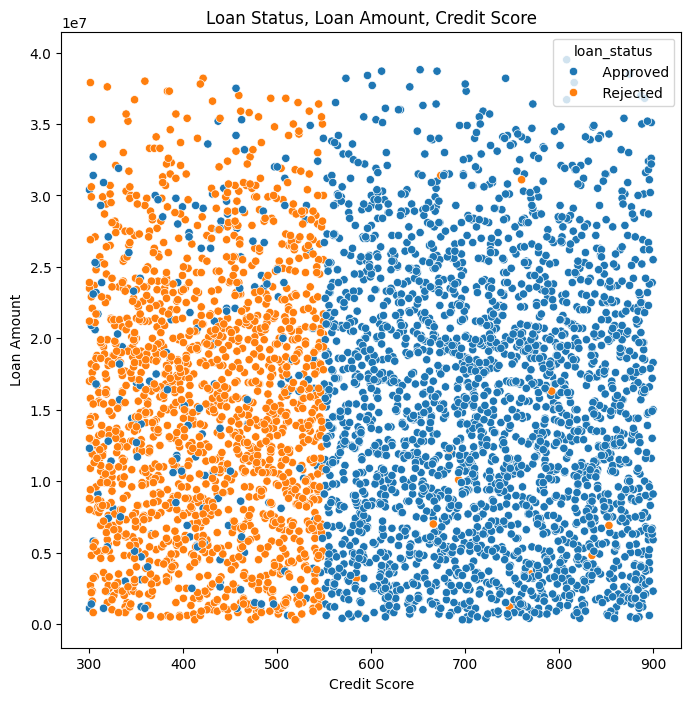

In [78]:
plt.figure(figsize=(8, 8))
sns.scatterplot(x=data['cibil_score'], y= data['loan_amount'], hue=data['loan_status'])
plt.title("Loan Status, Loan Amount, Credit Score")
plt.xlabel("Credit Score")
plt.ylabel("Loan Amount")

<Axes: xlabel='bank_asset_value', ylabel='Count'>

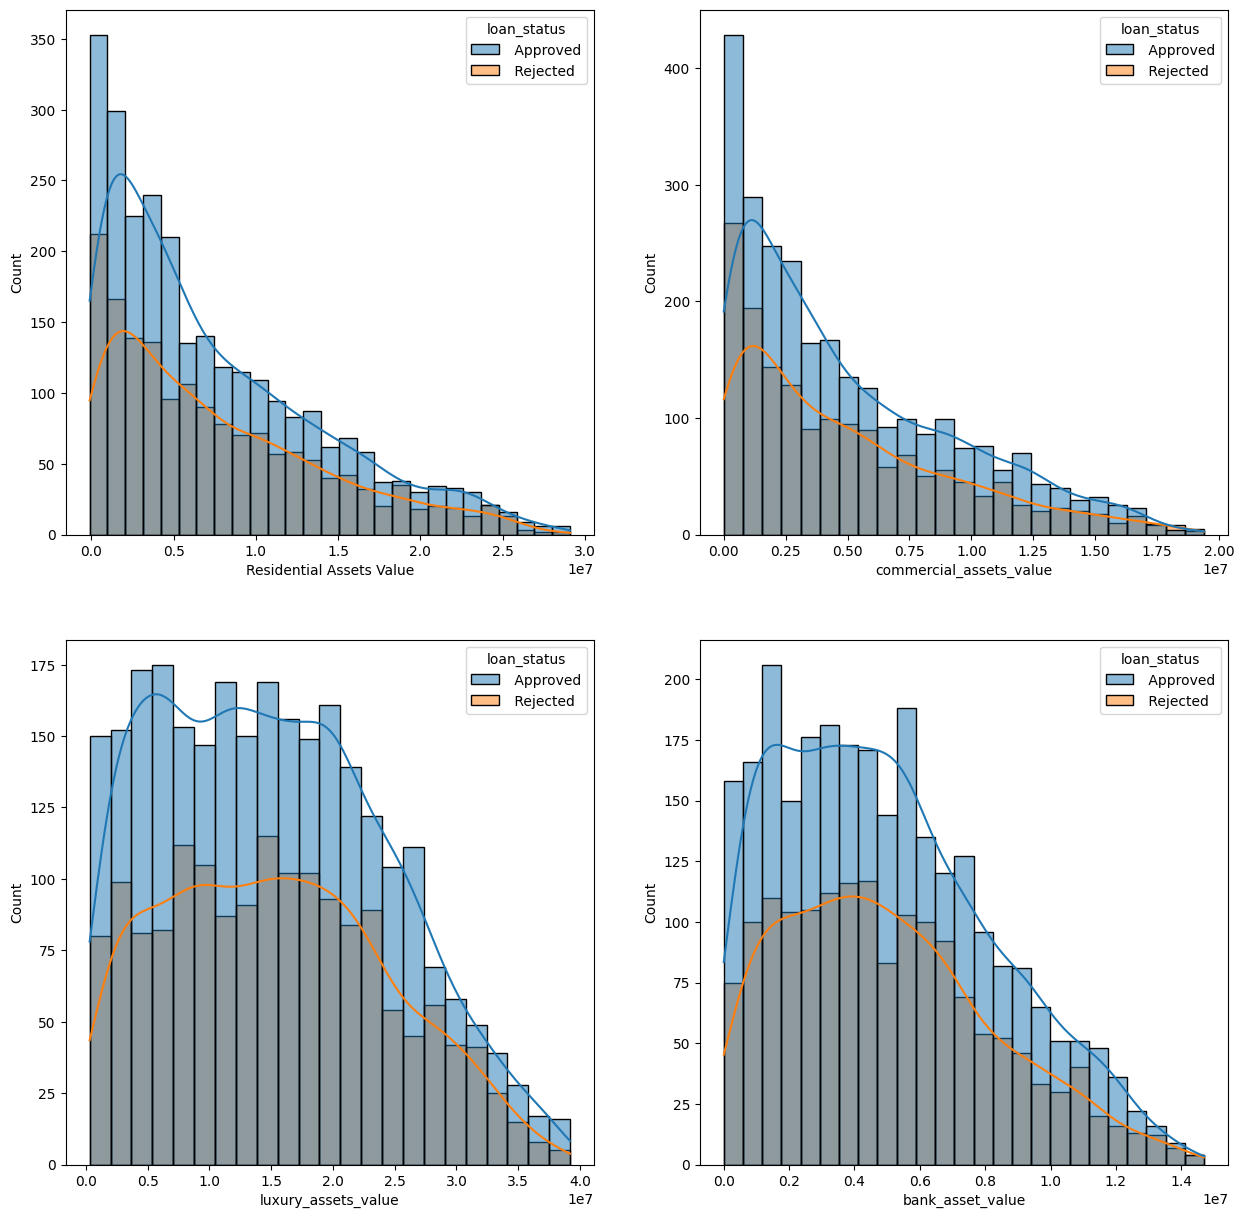

In [79]:
fig, axes = plt.subplots(2, 2, figsize=(15,15))

sns.histplot(data=data, x ='residential_assets_value', hue='loan_status', ax=axes[0, 0], kde=True)
axes[0,0].set_xlabel("Residential Assets Value")
axes[0,0].set_ylabel("Count")

sns.histplot(data=data, x='commercial_assets_value', hue='loan_status', ax=axes[0, 1], kde=True)

sns.histplot(data=data, x='luxury_assets_value', hue='loan_status', ax=axes[1, 0], kde=True)
sns.histplot(data=data, x='bank_asset_value', hue='loan_status', ax=axes[1, 1], kde=True)

Text(0.5, 0, 'Number of Dependents')

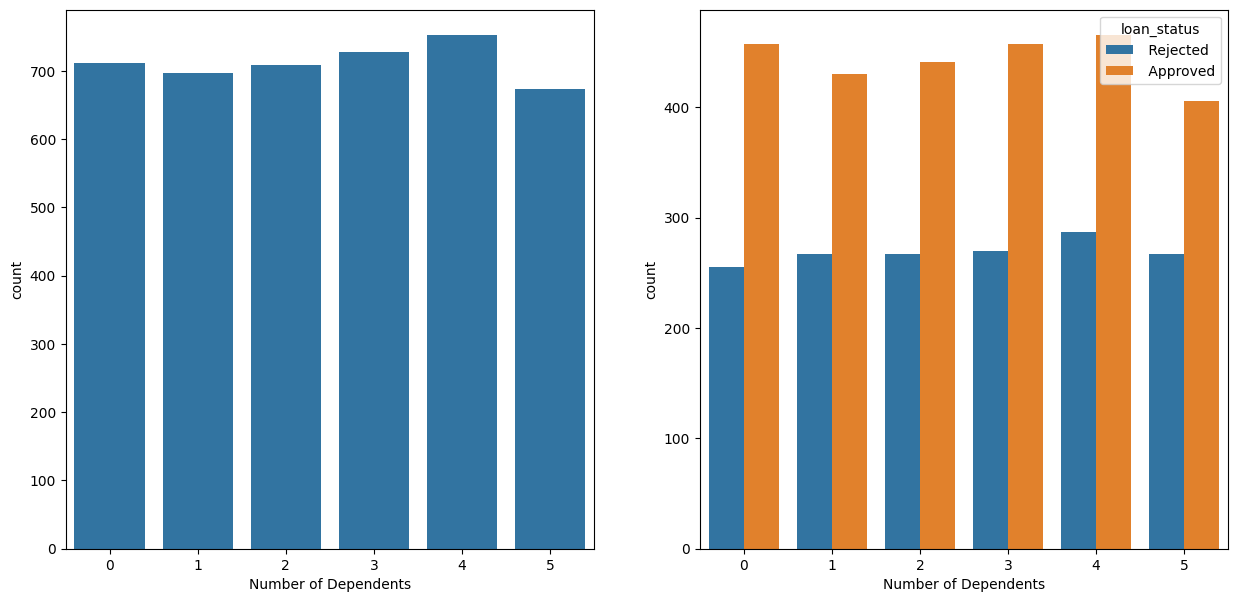

In [80]:
# number of dependents 
fig, axes = plt.subplots(1, 2, figsize=(15,7))
sns.countplot(data=data, x='no_of_dependents', ax=axes[0])
sns.countplot(data=data, x='no_of_dependents', hue='loan_status', ax=axes[1]) 
axes[0].set_xlabel("Number of Dependents")
axes[1].set_xlabel("Number of Dependents")

In [81]:
data['education'] = data['education'].str.strip()
data['education'].replace({'Graduate':1, 'Not Graduate':0}, inplace=True)

In [82]:
data['self_employed']=data['self_employed'].str.strip()
data['self_employed'].replace({'Yes':1, 'No':0}, inplace=True)

In [83]:
data['loan_status'] = data['loan_status'].str.strip()
data['loan_status'].replace({'Approved':1, 'Rejected':0}, inplace=True)

In [84]:
corr = data.corr()

<Axes: >

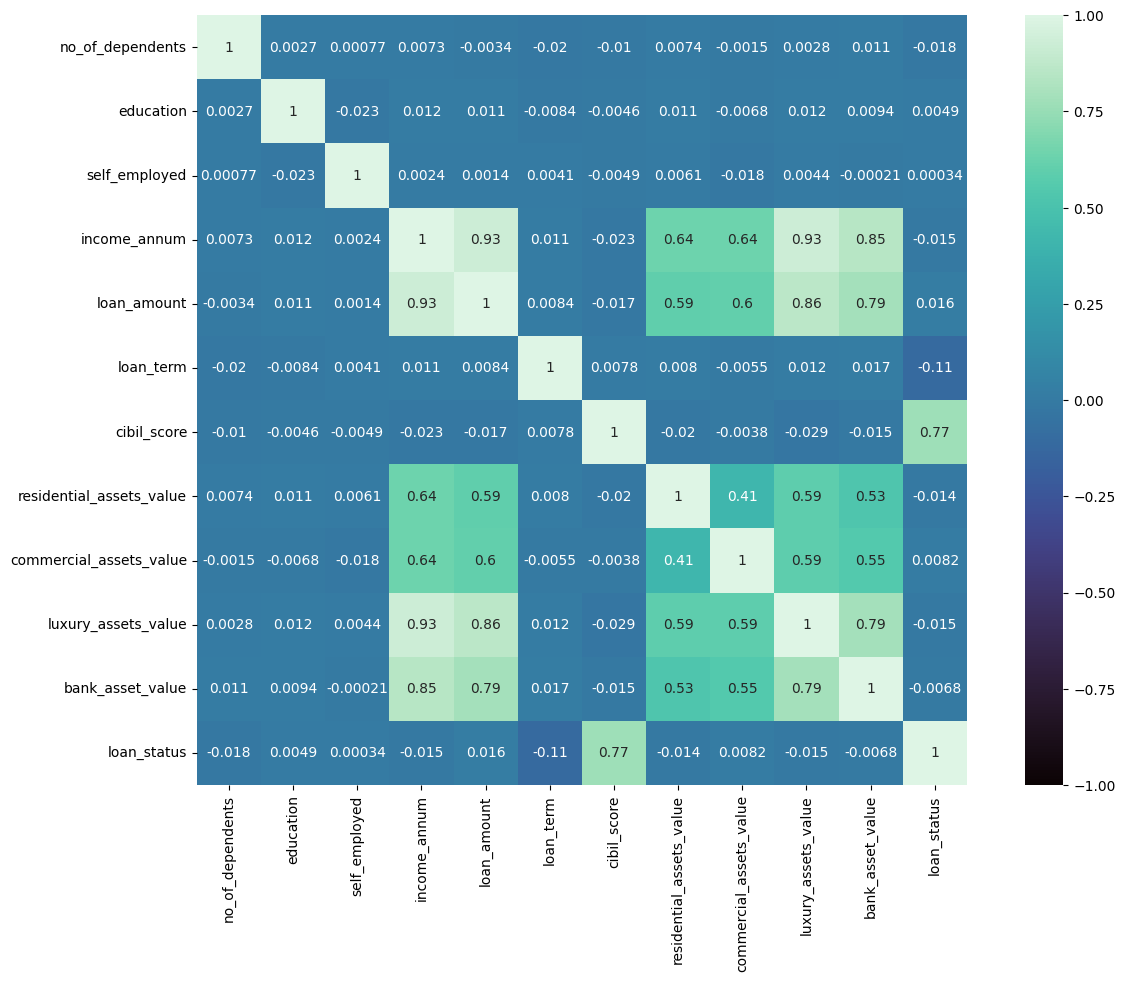

In [85]:
plt.figure(figsize=(15, 10))
sns.heatmap(corr, annot=True, cmap='mako', square=True, cbar=True, vmax=1.0, vmin=-1.0)

<Axes: xlabel='luxury_assets_value', ylabel='bank_asset_value'>

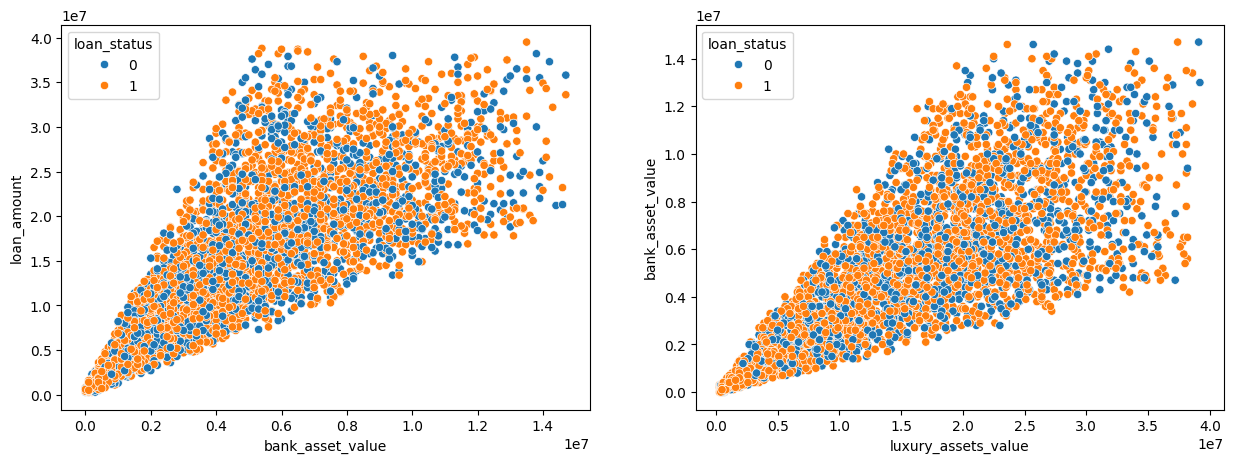

In [86]:
# bank assets value vs loan amount
fig, axes = plt.subplots(1, 2, figsize=(15, 5))
sns.scatterplot(data=data, x='bank_asset_value', y='loan_amount',hue='loan_status',ax=axes[0])
sns.scatterplot(data=data, x='luxury_assets_value', y='bank_asset_value',hue='loan_status',ax=axes[1])

In [87]:
# sns.pairplot(data = data, hue='loan_status')

# modeling 

In [88]:
X = data.drop('loan_status', axis=1)
y = data['loan_status']


In [89]:
X.shape, y.shape

((4269, 11), (4269,))

In [90]:
X_train,X_test,y_train,y_test = train_test_split(X, y, test_size=0.25, random_state=10)

In [91]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((3201, 11), (1068, 11), (3201,), (1068,))

In [92]:
rfc_model = RandomForestClassifier()

In [93]:
# hyperparameter tuning
param = {
    'n_estimators': [50,100],
    'criterion': ['gini', 'entropy'],
    'max_depth': [2,3,4,5,6,7,8],
    'min_samples_leaf': [1,2,3,4,5],
    'max_leaf_nodes' : [20,25,30,35,40,45,50],
    'bootstrap': [True, False],
    'class_weight': ['balanced', 'balanced_subsample'],
    'random_state': [None, 10]
}

rfc_CV = GridSearchCV(rfc_model, param_grid= param, cv=10, verbose=10, scoring='f1')
# rfc_CV.fit(X_train, y_train)

In [94]:
# print(rfc_CV.best_params_)
# print(rfc_CV.best_score_)
# print(rfc_CV.best_estimator_)


In [95]:
fine_tunned_model = RandomForestClassifier(class_weight='balanced_subsample', max_depth=8, max_leaf_nodes=50, min_samples_leaf=3, n_estimators=50)
fine_tunned_model.fit(X_train, y_train)

RandomForestClassifier(class_weight='balanced_subsample', max_depth=8,
                       max_leaf_nodes=50, min_samples_leaf=3, n_estimators=50)

In [96]:
prediction_y = fine_tunned_model.predict(X_test)

In [97]:
# checking the f1 and accuracy score
from sklearn.metrics import f1_score, accuracy_score, classification_report

f1 = f1_score(y_test, prediction_y)
accuracy = accuracy_score(y_test, prediction_y)

print(f'f1 score: {f1}')
print(f'accuracy score: {accuracy}')
print(classification_report(y_test, prediction_y))

f1 score: 0.9742813918305597
accuracy score: 0.9681647940074907
              precision    recall  f1-score   support

           0       0.94      0.97      0.96       401
           1       0.98      0.97      0.97       667

    accuracy                           0.97      1068
   macro avg       0.96      0.97      0.97      1068
weighted avg       0.97      0.97      0.97      1068

